In [42]:
#1 This Jupyter Notebook does feature engineering joining all features in all tables.

import matplotlib.pyplot as plt
import pandas as pd
import seaborn
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, r2_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer


In [24]:
#2 Read employees dataset
df_employee_raw = pd.read_csv('employees4.csv', na_values=['\\N'], on_bad_lines='skip', infer_datetime_format=True, parse_dates=['Date_Joined', 'Date_Resigned', 'Inactive_Date'])
df_employee_raw.info()
print(f'Total employees {str(df_employee_raw["Employee_Code"].nunique())}')

df_employee_raw

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1261 entries, 0 to 1260
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Employee_No          1261 non-null   int64         
 1   Employee_Code        1261 non-null   int64         
 2   Name                 1261 non-null   object        
 3   Title                1261 non-null   object        
 4   Address_Line_1       1261 non-null   object        
 5   Address_Line_2       1181 non-null   object        
 6   Address_Line_3       952 non-null    object        
 7   Date_of_Birth        1261 non-null   object        
 8   Gender               1261 non-null   object        
 9   Religion_ID          1261 non-null   int64         
 10  Marital_Status       1170 non-null   object        
 11  Designation_ID       1261 non-null   int64         
 12  Date_Joined          1261 non-null   datetime64[ns]
 13  Date_Resigned        955 non-null

,Employee_No,Employee_Code,Name,Title,Address_Line_1,Address_Line_2,Address_Line_3,Date_of_Birth,Gender,Religion_ID,...,Date_Resigned,Status,Status_Reason,Inactive_Date,Reporting_emp_1,Reporting_emp_2,Employment_Category,Employment_Type,Religion,Designation
0,347,6,Myrl Bechtelar MD,Mr,"No 40/B,","Nagahamula Road,",Kolonnawa.,1965-03-05,Male,1,...,NaN,Active,NaN,NaN,NaN,NaN,Staff,Permanant,Buddhist,Driver
1,348,33,Francis Mraz,Mr,"No 38/16/B,","Paanaluva,Vataraka,",Padukka.,1973-05-15,Male,1,...,NaN,Active,NaN,NaN,NaN,NaN,Staff,Permanant,Buddhist,Driver
2,349,53,Mr. Emmet Blick Jr.,Mr,"No 859/3,Rukmale Road,","Kottawa South,",Pannipitiya.,1974-12-06,Male,1,...,2021-06-28,Inactive,RESIGN,2021-06-28,NaN,NaN,Staff,Permanant,Buddhist,Account Clerk
3,351,77,Mr. Nelson Braun PhD,Ms,"St Marys avenue,","Niripola,",Hanwella.,1974-04-30,Female,4,...,2022-01-31,Inactive,Resign,2022-01-31,NaN,NaN,Staff,Permanant,Catholic,Purchasing Officer
4,352,88,Maximillian Hand,Mr,"No17/35,","Kridangana Mawatha,",Polgahawela.,1980-07-22,Male,1,...,NaN,Active,NaN,NaN,NaN,NaN,Staff,Permanant,Buddhist,Store Keeper
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2836,5434,Janis Borer Jr.,Ms,"No 339,","Kotte Road,",Nugegoda.,1993-03-23,Female,1,...,2022-12-22,Inactive,Resign,2022-12-22,NaN,NaN,Staff,Contarct Basis,Buddhist,Account Executive
1257,2890,5479,Delphia Haley,Mr,"No 267/3,Dhammananda Mawatha,Pahala Beligala,B...",NaN,NaN,1994-10-06,Male,1,...,0000-00-00,Active,NaN,0000-00-00,NaN,NaN,Staff,Contarct Basis,Buddhist,Quantity Surveyor
1258,2972,5480,Lance Stanton,Mr,"No 255/2,Jathika Niwasa,Arangala,Naula,matale.",NaN,NaN,1997-01-02,Male,1,...,NaN,Active,NaN,NaN,NaN,NaN,Staff,Contarct Basis,Buddhist,Software Developer
1259,2973,5481,Chauncey Reilly,Mr,"No 15/B,Badulla Road,Demodara",NaN,NaN,1990-08-16,Male,1,...,0000-00-00,Active,NaN,0000-00-00,NaN,NaN,Staff,Contarct Basis,Buddhist,Quantity Surveyor


In [25]:
#3 Read salary dataset
df_salary_raw = pd.read_csv('Salary.csv', na_values=['\\N'], on_bad_lines='skip')
df_salary_raw.info()
df_salary_raw

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208796 entries, 0 to 208795
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Employee_No    208796 non-null  int64  
 1   DeductionType  208796 non-null  int64  
 2   FactorName     208796 non-null  object 
 3   Amount         208796 non-null  float64
 4   year           208796 non-null  int64  
 5   month          208796 non-null  int64  
 6   SiteNo         208078 non-null  float64
 7   Area           208078 non-null  object 
dtypes: float64(2), int64(4), object(2)
memory usage: 12.7+ MB


,Employee_No,DeductionType,FactorName,Amount,year,month,SiteNo,Area
0,463,3,No of Full Worked Days,18.0,2020,6,194.0,Anuradhapura
1,487,3,No of Full Worked Days,22.0,2020,6,190.0,Anuradhapura
2,446,3,No of Full Worked Days,11.0,2020,6,169.0,Mathara
3,448,3,No of Full Worked Days,14.0,2020,6,169.0,Mathara
4,677,3,No of Full Worked Days,20.0,2020,6,169.0,Mathara
...,...,...,...,...,...,...,...,...
208791,2569,0,Accomadation Allowance,5000.0,2022,10,206.0,Gampaha
208792,2208,0,Accomadation Allowance,5000.0,2022,11,206.0,Gampaha
208793,2569,0,Accomadation Allowance,5000.0,2022,11,206.0,Gampaha
208794,2208,0,Accomadation Allowance,5000.0,2022,12,206.0,Gampaha


In [26]:
#4 Read leaves dataset, filter out special leave categories.
df_leaves = pd.read_csv('leaves_clean.csv', na_values=['\\N'], on_bad_lines='skip')
df_leaves.info()
df_leaves

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76443 entries, 0 to 76442
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Employee_No       76443 non-null  int64 
 1   leave_date        76443 non-null  object
 2   Type              76443 non-null  object
 3   Applied Date      76380 non-null  object
 4   leave_leave_date  5545 non-null   object
 5   Remarks           1088 non-null   object
 6   apply_type        76443 non-null  object
dtypes: int64(1), object(6)
memory usage: 4.1+ MB


,Employee_No,leave_date,Type,Applied Date,leave_leave_date,Remarks,apply_type
0,347,2020-01-29,Half Day,2022-01-04 15:33:36,NaN,NaN,Anual
1,347,2020-01-29,Half Day,2022-01-04 15:33:45,NaN,NaN,Anual
2,347,2020-01-29,Half Day,2022-01-04 15:36:35,NaN,NaN,Anual
3,347,2020-01-29,Half Day,2022-01-04 15:36:45,NaN,NaN,Anual
4,347,2020-01-29,Half Day,2022-01-04 18:02:42,NaN,NaN,Anual
...,...,...,...,...,...,...,...
76438,1306,2021-10-06,Full Day,2022-03-07 18:59:16,NaN,WFH,WFH
76439,1306,2021-10-07,Full Day,2022-03-07 18:59:16,NaN,WFH,WFH
76440,1306,2021-10-08,Full Day,2022-03-07 18:59:16,NaN,WFH,WFH
76441,1306,2021-10-09,Half Day,2022-03-07 18:59:17,NaN,WFH,WFH


In [27]:
#5 read attendance data 
df_attendance_raw = pd.read_csv('attendance.csv', na_values=['\\N'], on_bad_lines='skip', infer_datetime_format=True, parse_dates=['date'])
df_attendance_raw.info()
df_attendance_raw

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239963 entries, 0 to 239962
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            239963 non-null  int64         
 1   project_code  239963 non-null  float64       
 2   date          239963 non-null  datetime64[ns]
 3   out_date      239963 non-null  object        
 4   employee_no   239963 non-null  int64         
 5   in_time       239963 non-null  object        
 6   out_time      239963 non-null  object        
 7   Hourly_Time   239948 non-null  float64       
 8   Shift_Start   239963 non-null  object        
 9   Shift_End     239963 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 18.3+ MB


,id,project_code,date,out_date,employee_no,in_time,out_time,Hourly_Time,Shift_Start,Shift_End
0,280220,100.0,2021-02-01,2/1/2021,1272,8:30:00,17:00:00,8.50,8:30:00,17:00:00
1,280307,1.0,2021-02-01,2/1/2021,1539,8:30:00,17:00:00,8.50,8:30:00,17:00:00
2,280312,1.0,2021-02-01,2/1/2021,1540,7:45:00,17:00:00,9.25,8:30:00,17:00:00
3,280385,100.0,2021-02-01,2/1/2021,1273,8:00:00,18:00:00,10.00,8:30:00,17:00:00
4,322526,1.0,2021-02-01,2/1/2021,573,23:22:28,23:22:28,0.00,8:30:00,17:00:00
...,...,...,...,...,...,...,...,...,...,...
239958,1049809,206.0,2103-08-18,8/18/2103,2455,7:06:00,12:07:41,5.03,8:00:00,17:00:00
239959,1049810,206.0,2103-08-18,8/18/2103,2453,6:31:00,17:15:05,10.73,8:00:00,17:00:00
239960,986797,206.0,2103-08-19,8/19/2103,2406,7:35:41,7:35:41,0.00,0:00:00,0:00:00
239961,986798,206.0,2103-08-19,8/19/2103,2429,7:35:34,7:35:34,0.00,0:00:00,0:00:00


In [28]:
#6 Clean employee table
# Drop Employee_Code because it's not referenced in other tables.
df_employee = df_employee_raw.drop(['Employee_Code', 'Name', 'Address_Line_1', 'Address_Line_2', 'Address_Line_3',
                                    'Reporting_emp_1', 'Reporting_emp_2', 'Title', 'Religion', 'Religion_ID', 'Designation_ID'], axis=1)
df_employee

,Employee_No,Date_of_Birth,Gender,Marital_Status,Date_Joined,Date_Resigned,Status,Status_Reason,Inactive_Date,Employment_Category,Employment_Type,Designation
0,347,1965-03-05,Male,Married,1993-12-08,NaN,Active,NaN,NaN,Staff,Permanant,Driver
1,348,1973-05-15,Male,Married,1995-03-14,NaN,Active,NaN,NaN,Staff,Permanant,Driver
2,349,1974-12-06,Male,Married,1988-01-27,2021-06-28,Inactive,RESIGN,2021-06-28,Staff,Permanant,Account Clerk
3,351,1974-04-30,Female,Married,1999-10-01,2022-01-31,Inactive,Resign,2022-01-31,Staff,Permanant,Purchasing Officer
4,352,1980-07-22,Male,Married,2001-01-26,NaN,Active,NaN,NaN,Staff,Permanant,Store Keeper
...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2836,1993-03-23,Female,Single,2022-11-01,2022-12-22,Inactive,Resign,2022-12-22,Staff,Contarct Basis,Account Executive
1257,2890,1994-10-06,Male,Single,2022-11-21,0000-00-00,Active,NaN,0000-00-00,Staff,Contarct Basis,Quantity Surveyor
1258,2972,1997-01-02,Male,Single,2022-12-05,NaN,Active,NaN,NaN,Staff,Contarct Basis,Software Developer
1259,2973,1990-08-16,Male,Single,2022-12-08,0000-00-00,Active,NaN,0000-00-00,Staff,Contarct Basis,Quantity Surveyor


In [29]:
#7 Joint salary and employee data
New_sal_Earnings = df_salary_raw[df_salary_raw['DeductionType'] == 0 ].groupby(['Employee_No']).sum()

Earnings = New_sal_Earnings.drop(['DeductionType', 'year', 'month', 'SiteNo'], axis=1)
Earnings = Earnings.rename(columns={'Amount': 'Earnings'})
Earnings

Deductions = df_salary_raw[df_salary_raw['DeductionType'] == 1].groupby(['Employee_No']).sum()
Deductions = Deductions.drop(['DeductionType', 'year', 'month', 'SiteNo'], axis=1)
Deductions = Deductions.rename(columns={'Amount': 'Deductions'})

Salary = pd.merge(Earnings, Deductions, on='Employee_No', how='left')
employee_sal = pd.merge(df_employee, Salary, on='Employee_No', how='left')
employee_sal

,Employee_No,Date_of_Birth,Gender,Marital_Status,Date_Joined,Date_Resigned,Status,Status_Reason,Inactive_Date,Employment_Category,Employment_Type,Designation,Earnings,Deductions
0,347,1965-03-05,Male,Married,1993-12-08,NaN,Active,NaN,NaN,Staff,Permanant,Driver,660920.74,43101.00
1,348,1973-05-15,Male,Married,1995-03-14,NaN,Active,NaN,NaN,Staff,Permanant,Driver,1111986.50,46124.20
2,349,1974-12-06,Male,Married,1988-01-27,2021-06-28,Inactive,RESIGN,2021-06-28,Staff,Permanant,Account Clerk,NaN,NaN
3,351,1974-04-30,Female,Married,1999-10-01,2022-01-31,Inactive,Resign,2022-01-31,Staff,Permanant,Purchasing Officer,305889.36,32417.50
4,352,1980-07-22,Male,Married,2001-01-26,NaN,Active,NaN,NaN,Staff,Permanant,Store Keeper,634538.33,65659.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2836,1993-03-23,Female,Single,2022-11-01,2022-12-22,Inactive,Resign,2022-12-22,Staff,Contarct Basis,Account Executive,100000.00,25650.00
1257,2890,1994-10-06,Male,Single,2022-11-21,0000-00-00,Active,NaN,0000-00-00,Staff,Contarct Basis,Quantity Surveyor,140000.00,43716.66
1258,2972,1997-01-02,Male,Single,2022-12-05,NaN,Active,NaN,NaN,Staff,Contarct Basis,Software Developer,60000.00,5518.33
1259,2973,1990-08-16,Male,Single,2022-12-08,0000-00-00,Active,NaN,0000-00-00,Staff,Contarct Basis,Quantity Surveyor,160000.00,17783.33


In [30]:
#8 Joint salary and employee data - Total month and workeddays

New_sal_Dayscount = df_salary_raw[(df_salary_raw['FactorName'] == 'Total Working Days') ]
New_sal_Dayscount1 = New_sal_Dayscount.groupby(['Employee_No']).count()
New_sal_Dayscount1 = New_sal_Dayscount1.drop(['DeductionType', 'year', 'month', 'SiteNo', 'FactorName', 'Area'], axis=1)
New_sal_Dayscount1 = New_sal_Dayscount1.rename(columns={'Amount': 'Monthscount'})

employee_sal_Leave_mCount = pd.merge(employee_sal, New_sal_Dayscount1, on='Employee_No', how='left')

New_sal_Total1 = New_sal_Dayscount.groupby(['Employee_No']).sum()
New_sal_Total1 = New_sal_Total1.drop(['DeductionType', 'year', 'month', 'SiteNo'], axis=1)
New_sal_Total1 = New_sal_Total1.rename(columns={'Amount': 'TotalWorkedDays'})


employee_sal_Leave_mCount1 = pd.merge(employee_sal_Leave_mCount, New_sal_Total1, on='Employee_No', how='left')
employee_sal_Leave_mCount1

,Employee_No,Date_of_Birth,Gender,Marital_Status,Date_Joined,Date_Resigned,Status,Status_Reason,Inactive_Date,Employment_Category,Employment_Type,Designation,Earnings,Deductions,Monthscount,TotalWorkedDays
0,347,1965-03-05,Male,Married,1993-12-08,NaN,Active,NaN,NaN,Staff,Permanant,Driver,660920.74,43101.00,18.0,374.50
1,348,1973-05-15,Male,Married,1995-03-14,NaN,Active,NaN,NaN,Staff,Permanant,Driver,1111986.50,46124.20,18.0,441.50
2,349,1974-12-06,Male,Married,1988-01-27,2021-06-28,Inactive,RESIGN,2021-06-28,Staff,Permanant,Account Clerk,NaN,NaN,NaN,NaN
3,351,1974-04-30,Female,Married,1999-10-01,2022-01-31,Inactive,Resign,2022-01-31,Staff,Permanant,Purchasing Officer,305889.36,32417.50,6.0,87.75
4,352,1980-07-22,Male,Married,2001-01-26,NaN,Active,NaN,NaN,Staff,Permanant,Store Keeper,634538.33,65659.42,17.0,360.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2836,1993-03-23,Female,Single,2022-11-01,2022-12-22,Inactive,Resign,2022-12-22,Staff,Contarct Basis,Account Executive,100000.00,25650.00,2.0,37.00
1257,2890,1994-10-06,Male,Single,2022-11-21,0000-00-00,Active,NaN,0000-00-00,Staff,Contarct Basis,Quantity Surveyor,140000.00,43716.66,2.0,35.50
1258,2972,1997-01-02,Male,Single,2022-12-05,NaN,Active,NaN,NaN,Staff,Contarct Basis,Software Developer,60000.00,5518.33,1.0,20.00
1259,2973,1990-08-16,Male,Single,2022-12-08,0000-00-00,Active,NaN,0000-00-00,Staff,Contarct Basis,Quantity Surveyor,160000.00,17783.33,2.0,43.00


In [31]:
#9 join attendacne delay data to employee dataset # Late days are taken more than 15 min less than 30 min for the study
df_attendance_raw.dropna(subset=['Hourly_Time'], inplace=True)
df_attendance_raw = df_attendance_raw[df_attendance_raw['Hourly_Time'] > 3.5]
df_attendance_raw['in_time'] = df_attendance_raw['in_time'].apply(lambda x: pd.to_datetime(x, format='%H:%M:%S'))
df_attendance_raw['Shift_Start'] = df_attendance_raw['Shift_Start'].apply(lambda x: pd.to_datetime(x, format='%H:%M:%S'))
df_attendance_raw['NoLateSec'] = (df_attendance_raw['Shift_Start'] - df_attendance_raw['in_time']).dt.seconds
df_attendance_raw['LateDays'] = np.where((df_attendance_raw['NoLateSec'] > 900) & (df_attendance_raw['NoLateSec'] < 1800), 1, 0)

# Merger No of late days to employee data

df_attendance_raw = df_attendance_raw.rename(columns={'employee_no': 'Employee_No'})
df_attendance_delay = df_attendance_raw.groupby('Employee_No')['LateDays'].sum()

df_employee_final1 = pd.merge(employee_sal_Leave_mCount1, df_attendance_delay, on='Employee_No', how='left')
df_employee_final1



,Employee_No,Date_of_Birth,Gender,Marital_Status,Date_Joined,Date_Resigned,Status,Status_Reason,Inactive_Date,Employment_Category,Employment_Type,Designation,Earnings,Deductions,Monthscount,TotalWorkedDays,LateDays
0,347,1965-03-05,Male,Married,1993-12-08,NaN,Active,NaN,NaN,Staff,Permanant,Driver,660920.74,43101.00,18.0,374.50,16.0
1,348,1973-05-15,Male,Married,1995-03-14,NaN,Active,NaN,NaN,Staff,Permanant,Driver,1111986.50,46124.20,18.0,441.50,25.0
2,349,1974-12-06,Male,Married,1988-01-27,2021-06-28,Inactive,RESIGN,2021-06-28,Staff,Permanant,Account Clerk,NaN,NaN,NaN,NaN,1.0
3,351,1974-04-30,Female,Married,1999-10-01,2022-01-31,Inactive,Resign,2022-01-31,Staff,Permanant,Purchasing Officer,305889.36,32417.50,6.0,87.75,31.0
4,352,1980-07-22,Male,Married,2001-01-26,NaN,Active,NaN,NaN,Staff,Permanant,Store Keeper,634538.33,65659.42,17.0,360.50,103.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2836,1993-03-23,Female,Single,2022-11-01,2022-12-22,Inactive,Resign,2022-12-22,Staff,Contarct Basis,Account Executive,100000.00,25650.00,2.0,37.00,0.0
1257,2890,1994-10-06,Male,Single,2022-11-21,0000-00-00,Active,NaN,0000-00-00,Staff,Contarct Basis,Quantity Surveyor,140000.00,43716.66,2.0,35.50,9.0
1258,2972,1997-01-02,Male,Single,2022-12-05,NaN,Active,NaN,NaN,Staff,Contarct Basis,Software Developer,60000.00,5518.33,1.0,20.00,7.0
1259,2973,1990-08-16,Male,Single,2022-12-08,0000-00-00,Active,NaN,0000-00-00,Staff,Contarct Basis,Quantity Surveyor,160000.00,17783.33,2.0,43.00,2.0


In [34]:
#10 merge leave count details to employee data and clearn up employee data and fill null wiht zero

df_leaves = df_leaves.rename(columns={'leave_date': 'Leave_Date',
                                      'Type': 'Leave_Factor',
                                      'Applied Date': 'Applied_Date',
                                      'leave_leave_date': 'Lieu_Leave_Date',
                                      'Remarks': 'Remarks',
                                      'apply_type': 'Leave_Category'})
df_leaves_type_map = {'Half Day': 0.5, 'Full Day': 1}
df_leaves['Leave_Factor'] = df_leaves['Leave_Factor'].map(df_leaves_type_map)
df_leaves_legit = pd.DataFrame(df_leaves.loc[(df_leaves['Leave_Category'] != 'Liue Leave') & (df_leaves['Leave_Category'] != 'Curfew') & (df_leaves['Leave_Category'] != 'Sat Holiday')])
df_leaves_summary_temp = df_leaves.groupby('Employee_No')['Leave_Factor'].sum()
df_leaves_summary = pd.DataFrame({'Employee_No': df_leaves_summary_temp.index, 'Leave_Count':  df_leaves_summary_temp.values})
df_leaves_summary.head()
df_employee_final2 = pd.merge(df_employee_final1, df_leaves_summary, on='Employee_No', how='left')
df_employee_final2



,Employee_No,Date_of_Birth,Gender,Marital_Status,Date_Joined,Date_Resigned,Status,Status_Reason,Inactive_Date,Employment_Category,Employment_Type,Designation,Earnings,Deductions,Monthscount,TotalWorkedDays,LateDays,Leave_Count
0,347,1965-03-05,Male,Married,1993-12-08,NaN,Active,NaN,NaN,Staff,Permanant,Driver,660920.74,43101.00,18.0,374.50,16.0,0.0
1,348,1973-05-15,Male,Married,1995-03-14,NaN,Active,NaN,NaN,Staff,Permanant,Driver,1111986.50,46124.20,18.0,441.50,25.0,0.0
2,349,1974-12-06,Male,Married,1988-01-27,2021-06-28,Inactive,RESIGN,2021-06-28,Staff,Permanant,Account Clerk,NaN,NaN,NaN,NaN,1.0,NaN
3,351,1974-04-30,Female,Married,1999-10-01,2022-01-31,Inactive,Resign,2022-01-31,Staff,Permanant,Purchasing Officer,305889.36,32417.50,6.0,87.75,31.0,0.0
4,352,1980-07-22,Male,Married,2001-01-26,NaN,Active,NaN,NaN,Staff,Permanant,Store Keeper,634538.33,65659.42,17.0,360.50,103.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2836,1993-03-23,Female,Single,2022-11-01,2022-12-22,Inactive,Resign,2022-12-22,Staff,Contarct Basis,Account Executive,100000.00,25650.00,2.0,37.00,0.0,0.0
1257,2890,1994-10-06,Male,Single,2022-11-21,0000-00-00,Active,NaN,0000-00-00,Staff,Contarct Basis,Quantity Surveyor,140000.00,43716.66,2.0,35.50,9.0,0.0
1258,2972,1997-01-02,Male,Single,2022-12-05,NaN,Active,NaN,NaN,Staff,Contarct Basis,Software Developer,60000.00,5518.33,1.0,20.00,7.0,0.0
1259,2973,1990-08-16,Male,Single,2022-12-08,0000-00-00,Active,NaN,0000-00-00,Staff,Contarct Basis,Quantity Surveyor,160000.00,17783.33,2.0,43.00,2.0,0.0


In [35]:
#11 clean and get avearge values for each employees

import warnings
warnings.filterwarnings('ignore')

df_employee_final3 = df_employee_final2

df_employee_final3['Leave_Count'].fillna(0, inplace=True)
df_employee_final3['Earnings'].fillna(0, inplace=True)
df_employee_final3['Deductions'].fillna(0, inplace=True)
df_employee_final3['Monthscount'].fillna(0, inplace=True)
df_employee_final3['TotalWorkedDays'].fillna(0, inplace=True)

# Removed employees who joint receinty (<3 month)
df_employee_final3.drop(df_employee_final3[(df_employee_final3['Monthscount'] < 3) & (df_employee_final3['Status'] == 'Active')].index, inplace=True)
# Removed employees who resigned before implemting the payroll who did not receive any earning during considered time period
df_employee_final3.drop(df_employee_final3[(df_employee_final3['Earnings'] == 0)].index, inplace=True)
#3 Removed employees who worked less than 5 days as they are daypay employee/tempory employee
df_employee_final3.drop(df_employee_final3[(df_employee_final3['TotalWorkedDays'] <= 5)].index, inplace=True)

df_employee_final3 = df_employee_final3[df_employee_final2['Monthscount']>0]
df_employee_final3['LateDays'].fillna(0, inplace=True)

gender_map = {'Female': 0, 'Male': 1}
material_status_map = {'Single': 0, 'Married': 1}
df_employee_final3['Gender_Code'] = df_employee_final3['Gender'].map(gender_map)
df_employee_final3['Material_Status_Code'] = df_employee_final3['Marital_Status'].map(material_status_map)
df_employee_final3['Material_Status_Code'] = df_employee_final3['Material_Status_Code'].fillna(2)

df_employee_final3['Avr_Leave_Count'] = df_employee_final3['Leave_Count']/df_employee_final3['TotalWorkedDays']
df_employee_final3['Avr_NoLateDays'] = df_employee_final3['LateDays']/df_employee_final3['TotalWorkedDays']

#3 Removed outliers
df_employee_final3.drop(df_employee_final3[(df_employee_final3['LateDays'] > 30) | (df_employee_final3['Avr_Leave_Count'] > 30)].index, inplace=True)

df_employee_final3['Avr_Earnings'] = df_employee_final3['Earnings']/df_employee_final3['Monthscount']
df_employee_final3['Avr_Deductions'] = df_employee_final3['Deductions']/df_employee_final3['Monthscount']
#average paid work days
df_employee_final3['Avr_paidWorkedDays'] = df_employee_final3['TotalWorkedDays']/25
df_employee_final3

,Employee_No,Date_of_Birth,Gender,Marital_Status,Date_Joined,Date_Resigned,Status,Status_Reason,Inactive_Date,Employment_Category,...,TotalWorkedDays,LateDays,Leave_Count,Gender_Code,Material_Status_Code,Avr_Leave_Count,Avr_NoLateDays,Avr_Earnings,Avr_Deductions,Avr_paidWorkedDays
0,347,1965-03-05,Male,Married,1993-12-08,NaN,Active,NaN,NaN,Staff,...,374.50,16.0,0.0,1,1.0,0.0,0.042724,36717.818889,2394.500000,14.98
1,348,1973-05-15,Male,Married,1995-03-14,NaN,Active,NaN,NaN,Staff,...,441.50,25.0,0.0,1,1.0,0.0,0.056625,61777.027778,2562.455556,17.66
17,373,1990-07-22,Male,Married,2010-10-26,0000-00-00,Active,NaN,0000-00-00,Staff,...,439.00,21.0,0.0,1,1.0,0.0,0.047836,55561.165556,2936.225000,17.56
22,380,1978-11-24,Male,Married,2012-01-29,NaN,Active,NaN,NaN,Staff,...,479.25,14.0,0.0,1,1.0,0.0,0.029212,34635.456667,1569.352222,19.17
31,394,1993-03-18,Male,Married,2013-06-27,2021-12-17,Inactive,RESIGN,2021-12-17,Staff,...,128.00,12.0,0.0,1,1.0,0.0,0.093750,33639.832000,2776.840000,5.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1250,2737,1984-09-29,Male,Married,2022-09-27,NaN,Active,NaN,NaN,Staff,...,75.00,5.0,0.0,1,1.0,0.0,0.066667,80000.000000,39885.415000,3.00
1252,2771,1981-12-13,Male,Married,2022-10-06,0000-00-00,Active,NaN,0000-00-00,Staff,...,67.50,17.0,0.0,1,1.0,0.0,0.251852,300000.000000,34159.143333,2.70
1253,2812,1958-09-29,Male,Married,2022-10-17,2022-10-17,Inactive,resign,2022-10-17,Staff,...,11.00,3.0,0.0,1,1.0,0.0,0.272727,49257.810000,27800.000000,0.44
1255,2831,1996-06-17,Male,Single,2022-10-25,NaN,Active,NaN,NaN,Staff,...,52.00,8.0,0.0,1,0.0,0.0,0.153846,30000.000000,8861.110000,2.08


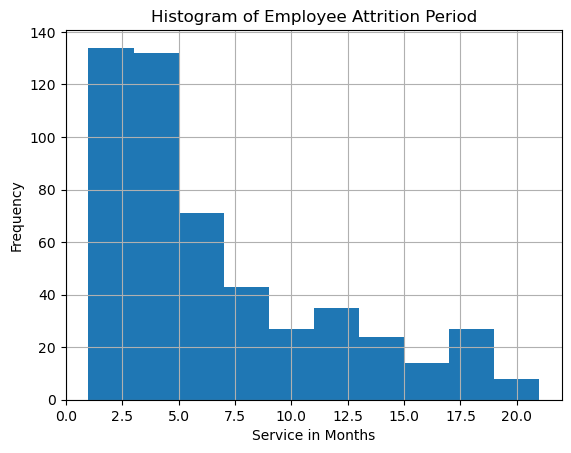

count    515.000000
mean       6.258252
std        5.019544
min        1.000000
25%        2.000000
50%        4.000000
75%        9.000000
max       21.000000
Name: Monthscount, dtype: float64

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Plot a histogram of the column
df_employee_final3['Monthscount'].hist()

# Add labels and title
plt.xlabel('Service in Months')
plt.ylabel('Frequency')
plt.title('Histogram of Employee Attrition Period')

# Show the plot
plt.show()

df_employee_final3['Monthscount'].describe()

In [37]:
#Eearly attrition field is introducted

df_employee_final3['IsEarlyAttrition'] = np.where(df_employee_final3['Monthscount'] > 3, 0, 1)
df_employee_final3['Monthscount'].describe()

count    515.000000
mean       6.258252
std        5.019544
min        1.000000
25%        2.000000
50%        4.000000
75%        9.000000
max       21.000000
Name: Monthscount, dtype: float64

In [38]:
df_employee_final3.corr() > 0.85

,Employee_No,Earnings,Deductions,Monthscount,TotalWorkedDays,LateDays,Leave_Count,Gender_Code,Material_Status_Code,Avr_Leave_Count,Avr_NoLateDays,Avr_Earnings,Avr_Deductions,Avr_paidWorkedDays,IsEarlyAttrition
Employee_No,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Earnings,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
Deductions,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
Monthscount,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False
TotalWorkedDays,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False
LateDays,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
Leave_Count,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Gender_Code,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
Material_Status_Code,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
Avr_Leave_Count,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [40]:


x = df_employee_final3[['Gender_Code', 'Material_Status_Code', 'Avr_paidWorkedDays', 'Avr_Leave_Count', 'Avr_Earnings', 'Avr_Deductions', 'Avr_NoLateDays']]
y = df_employee_final3['IsEarlyAttrition']

lr_x_train, lr_x_test, lr_y_train, lr_y_test = train_test_split(x, y, test_size=0.2, random_state=55)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(lr_x_train)
X_test_scaled = scaler.transform(lr_x_test)

model = LogisticRegression()
fitted_model = model.fit(X_train_scaled, lr_y_train)



Accuracy of Logistic Regression: 0.9223300970873787
Precision: 0.8695652173913043
Recall: 0.9523809523809523
F1 score: 0.909090909090909
R2 score: 0.909090909090909


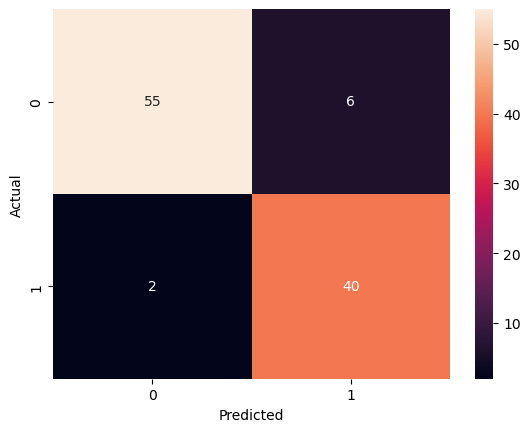

In [53]:
lr_y_predicted = model.predict(X_test_scaled)
lr_accuracy = accuracy_score(lr_y_test, lr_y_predicted)
print(f'Accuracy of Logistic Regression: {lr_accuracy}')
lr_precision = precision_score(lr_y_test, lr_y_predicted)
print(f'Precision: {lr_precision}')
lr_recall = recall_score(lr_y_test, lr_y_predicted)
print(f'Recall: {lr_recall}')
lr_f1 = f1_score(lr_y_test, lr_y_predicted)
print(f'F1 score: {lr_f1}')
lr_r2 = f1_score(lr_y_test, lr_y_predicted)
print(f'R2 score: {lr_r2}')
lr_confusion_matrix = confusion_matrix(lr_y_test, lr_y_predicted)

sns.heatmap(lr_confusion_matrix,annot=True,fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Accuracy of Random Forest Classifier: 0.9514563106796117
Precision: 0.9302325581395349
Recall: 0.9523809523809523
F1 score: 0.9411764705882352
R2 score: 0.7989851678376267


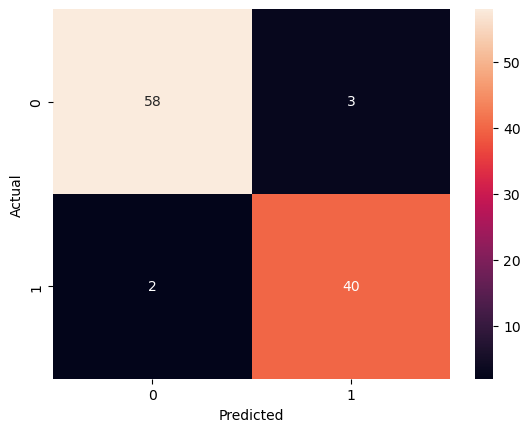

In [54]:
#model using Random forest

rf_x_train, rf_x_test, rf_y_train, rf_y_test = train_test_split(x, y, test_size=0.2, random_state=55)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(rf_x_train, rf_y_train)
rf_y_predicted = rf_model.predict(rf_x_test)

rf_accuracy = accuracy_score(rf_y_test, rf_y_predicted)
print(f'Accuracy of Random Forest Classifier: {rf_accuracy}')
rf_precision = precision_score(rf_y_test, rf_y_predicted)
print(f'Precision: {rf_precision}')
rf_recall = recall_score(rf_y_test, rf_y_predicted)
print(f'Recall: {rf_recall}')
rf_f1 = f1_score(rf_y_test, rf_y_predicted)
print(f'F1 score: {rf_f1}')
rf_r2 = r2_score(rf_y_test, rf_y_predicted)
print(f'R2 score: {rf_r2}')


lr_confusion_matrix = confusion_matrix(rf_y_test, rf_y_predicted)


sns.heatmap(lr_confusion_matrix,annot=True,fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

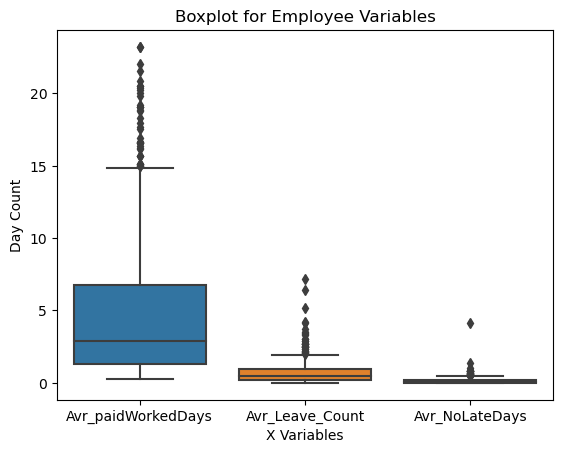

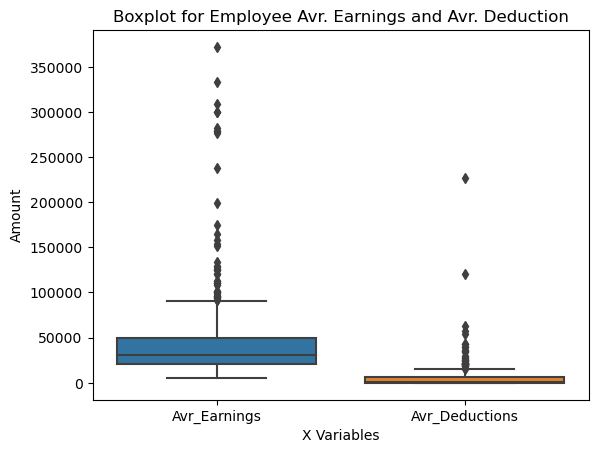

In [68]:

import seaborn as sns
import matplotlib.pyplot as plt
# Define x and y variables
x = df_employee_final3[['Avr_paidWorkedDays', 'Avr_Leave_Count', 'Avr_NoLateDays']]
y = df_employee_final3['IsEarlyAttrition']

# Create a boxplot using Seaborn
sns.boxplot(data=x)
plt.title('Boxplot for Employee Variables')
plt.xlabel('X Variables')
plt.ylabel('Day Count')

# Show the plot
plt.show()


x = df_employee_final3[['Avr_Earnings', 'Avr_Deductions']]
y = df_employee_final3['IsEarlyAttrition']

# Create a boxplot using Seaborn
sns.boxplot(data=x)
plt.title('Boxplot for Employee Avr. Earnings and Avr. Deduction')
plt.xlabel('X Variables')
plt.ylabel('Amount')

# Show the plot
plt.show()

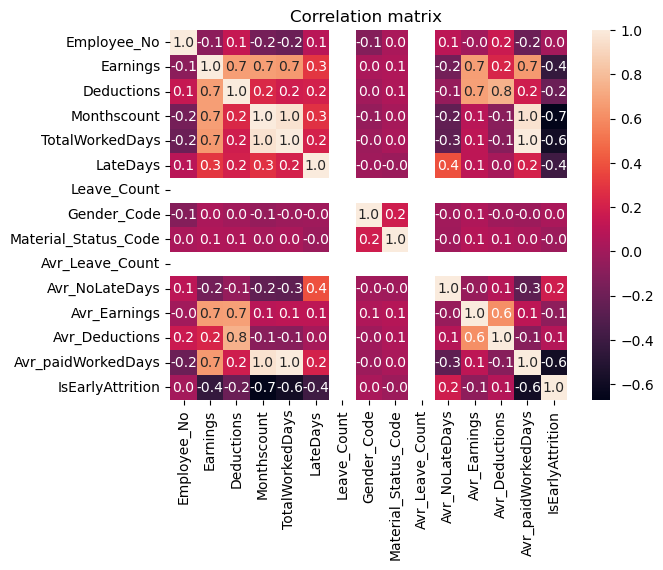

In [48]:
matrix = df_employee_final3.corr().round(2)
sns.heatmap(matrix, annot=True, fmt='.1f')
plt.title("Correlation matrix ")

plt.show()


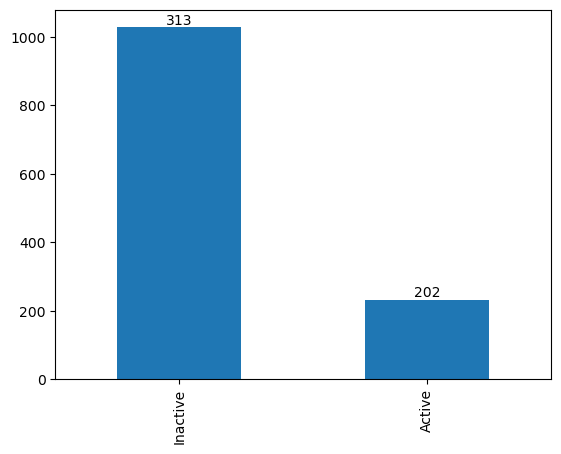

In [46]:
temp_plot = df_employee_raw['Status'].value_counts().plot(kind='bar')
temp_plot.bar_label(temp_plot.containers[0], labels=df_employee_final3['IsEarlyAttrition'].value_counts())
plt.show()

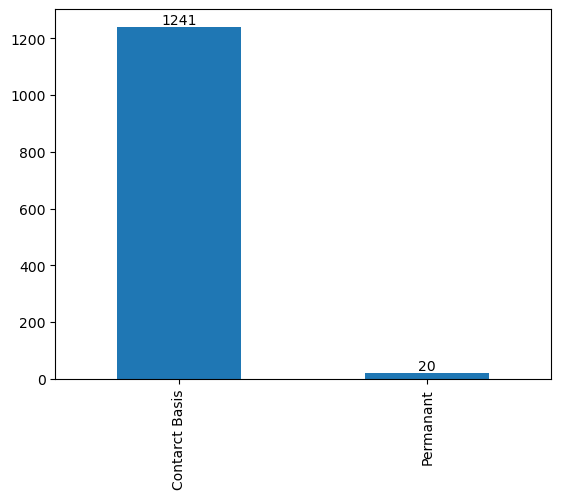

In [47]:
temp_plot = df_employee_raw['Employment_Type'].value_counts().plot(kind='bar')
temp_plot.bar_label(temp_plot.containers[0], labels=df_employee_raw['Employment_Type'].value_counts())
plt.show()

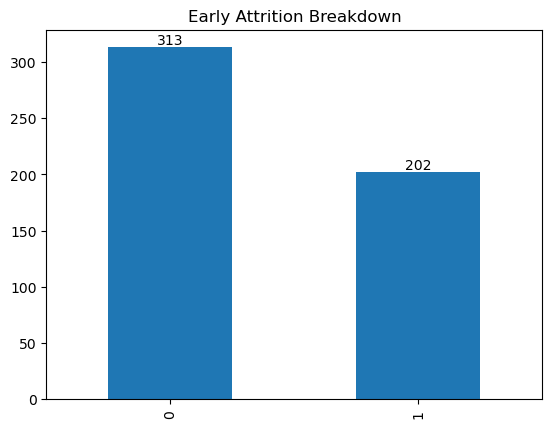

In [50]:
temp_plot = df_employee_final3['IsEarlyAttrition'].value_counts().plot(kind='bar')
temp_plot.bar_label(temp_plot.containers[0], labels=df_employee_final3['IsEarlyAttrition'].value_counts())
plt.title('Early Attrition Breakdown')
plt.show()